# **Customer Churn Prediction for Interconnect: A Machine Learning Approach**

## Introduction

Customer churn is a critical concern for businesses in the telecom industry, where retaining existing customers is often more cost-effective than acquiring new ones. The telecom operator **Interconnect** aims to improve its customer retention strategy by developing a machine learning model that accurately predicts customer churn. By identifying the factors contributing to customer departure, the company can implement targeted strategies to enhance customer satisfaction and reduce churn rates. 

This project involves a structured approach to prepare, process, and analyze the dataset, build various machine learning models, and evaluate their performance using metrics such as **Accuracy** and **AUC-ROC Score**. The project also includes hyperparameter tuning to optimize model performance and a feature importance analysis to understand the most significant factors influencing churn.

## Data Loading and Inspection

- We are importing necessary libraries.

- Loading all four datasets.

- Displaying their structure, missing values, and initial rows.

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the datasets from your Downloads folder
contract = pd.read_csv('/datasets/final_provider/contract.csv')
personal = pd.read_csv('/datasets/final_provider/personal.csv')
internet = pd.read_csv('/datasets/final_provider/internet.csv')
phone = pd.read_csv('/datasets/final_provider/phone.csv')

In [3]:
# Load the datasets from your Downloads folder
contract = pd.read_csv('/datasets/final_provider/contract.csv')
personal = pd.read_csv('/datasets/final_provider/personal.csv')
internet = pd.read_csv('/datasets/final_provider/internet.csv')
phone = pd.read_csv('/datasets/final_provider/phone.csv')

In [4]:
# Display first few rows of each dataset
print("Contract Dataset:")
display(contract.head())
print("\nPersonal Dataset:")
display(personal.head())
print("\nInternet Dataset:")
display(internet.head())
print("\nPhone Dataset:")
display(phone.head())

Contract Dataset:


,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,29.85
1,5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,1889.5
2,3668-QPYBK,2019-10-01,2019-12-01 00:00:00,Month-to-month,Yes,Mailed check,53.85,108.15
3,7795-CFOCW,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1840.75
4,9237-HQITU,2019-09-01,2019-11-01 00:00:00,Month-to-month,Yes,Electronic check,70.70,151.65



Personal Dataset:


,customerID,gender,SeniorCitizen,Partner,Dependents
0,7590-VHVEG,Female,0,Yes,No
1,5575-GNVDE,Male,0,No,No
2,3668-QPYBK,Male,0,No,No
3,7795-CFOCW,Male,0,No,No
4,9237-HQITU,Female,0,No,No



Internet Dataset:


,customerID,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,Fiber optic,No,No,No,No,No,No



Phone Dataset:


,customerID,MultipleLines
0,5575-GNVDE,No
1,3668-QPYBK,No
2,9237-HQITU,No
3,9305-CDSKC,Yes
4,1452-KIOVK,Yes


## Data Inspection and Preparation

- Checking Data Types and Missing Values.

- Creating the Churn column.

- Merging All Datasets.

In [5]:
# Inspecting the dataframes to understand structure and missing values
print("\n--- Contract Data Information ---")
contract.info()
print("\nMissing values in Contract Data:")
print(contract.isna().sum())

print("\n--- Personal Data Information ---")
personal.info()
print("\nMissing values in Personal Data:")
print(personal.isna().sum())

print("\n--- Internet Data Information ---")
internet.info()
print("\nMissing values in Internet Data:")
print(internet.isna().sum())

print("\n--- Phone Data Information ---")
phone.info()
print("\nMissing values in Phone Data:")
print(phone.isna().sum())


--- Contract Data Information ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   BeginDate         7043 non-null   object 
 2   EndDate           7043 non-null   object 
 3   Type              7043 non-null   object 
 4   PaperlessBilling  7043 non-null   object 
 5   PaymentMethod     7043 non-null   object 
 6   MonthlyCharges    7043 non-null   float64
 7   TotalCharges      7043 non-null   object 
dtypes: float64(1), object(7)
memory usage: 440.3+ KB

Missing values in Contract Data:
customerID          0
BeginDate           0
EndDate             0
Type                0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
dtype: int64

--- Personal Data Information ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Dat

### Findings from Data Inspection:

- The Contract dataset (7043 rows) is complete with no missing values. However, the TotalCharges column is incorrectly stored as an object type and needs to be converted to float.
- The Personal dataset (7043 rows) also has no missing values and is well-structured.
- The Internet dataset (5517 rows) has significantly fewer entries than the contract dataset, indicating that not all customers use internet services.
- The Phone dataset (6361 rows) has fewer entries compared to the contract dataset, indicating that not all customers use phone services.
- All datasets have a customerID column, which is essential for merging.

## Data Preparation and Merging

In [6]:
# Convert 'TotalCharges' to numeric, forcing errors to NaN
contract['TotalCharges'] = pd.to_numeric(contract['TotalCharges'], errors='coerce')

# Checking how many rows have missing values in 'TotalCharges'
missing_totalcharges = contract['TotalCharges'].isna().sum()
print(f"\nNumber of missing values in 'TotalCharges' after conversion: {missing_totalcharges}")

# Convert 'BeginDate' and 'EndDate' to datetime format
contract['BeginDate'] = pd.to_datetime(contract['BeginDate'])
contract['EndDate'] = pd.to_datetime(contract['EndDate'], errors='coerce')

# Create a 'Churn' column: 1 = churned customer, 0 = active customer
contract['Churn'] = np.where(contract['EndDate'].isna(), 0, 1)

# Convert column names to lowercase and replace spaces with underscores for consistency
contract.columns = contract.columns.str.lower().str.replace(' ', '_')
personal.columns = personal.columns.str.lower().str.replace(' ', '_')
internet.columns = internet.columns.str.lower().str.replace(' ', '_')
phone.columns = phone.columns.str.lower().str.replace(' ', '_')

# Merge all datasets using 'customerid'
merged_df = contract.merge(personal, on='customerid', how='left')
merged_df = merged_df.merge(internet, on='customerid', how='left')
merged_df = merged_df.merge(phone, on='customerid', how='left')

# Display the first few rows of the merged dataframe
print("\n--- Merged DataFrame Information ---")
merged_df.info()
display(merged_df.head())

# Check for missing values in the merged DataFrame
print("\nMissing values in the Merged DataFrame:")
print(merged_df.isna().sum())


Number of missing values in 'TotalCharges' after conversion: 11

--- Merged DataFrame Information ---
<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   customerid        7043 non-null   object        
 1   begindate         7043 non-null   datetime64[ns]
 2   enddate           1869 non-null   datetime64[ns]
 3   type              7043 non-null   object        
 4   paperlessbilling  7043 non-null   object        
 5   paymentmethod     7043 non-null   object        
 6   monthlycharges    7043 non-null   float64       
 7   totalcharges      7032 non-null   float64       
 8   churn             7043 non-null   int64         
 9   gender            7043 non-null   object        
 10  seniorcitizen     7043 non-null   int64         
 11  partner           7043 non-null   object        
 12  dependents        7043 non-nu

,customerid,begindate,enddate,type,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn,gender,...,partner,dependents,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,multiplelines
0,7590-VHVEG,2020-01-01,NaT,Month-to-month,Yes,Electronic check,29.85,29.85,0,Female,...,Yes,No,DSL,No,Yes,No,No,No,No,NaN
1,5575-GNVDE,2017-04-01,NaT,One year,No,Mailed check,56.95,1889.50,0,Male,...,No,No,DSL,Yes,No,Yes,No,No,No,No
2,3668-QPYBK,2019-10-01,2019-12-01,Month-to-month,Yes,Mailed check,53.85,108.15,1,Male,...,No,No,DSL,Yes,Yes,No,No,No,No,No
3,7795-CFOCW,2016-05-01,NaT,One year,No,Bank transfer (automatic),42.30,1840.75,0,Male,...,No,No,DSL,Yes,No,Yes,Yes,No,No,NaN
4,9237-HQITU,2019-09-01,2019-11-01,Month-to-month,Yes,Electronic check,70.70,151.65,1,Female,...,No,No,Fiber optic,No,No,No,No,No,No,No



Missing values in the Merged DataFrame:
customerid             0
begindate              0
enddate             5174
type                   0
paperlessbilling       0
paymentmethod          0
monthlycharges         0
totalcharges          11
churn                  0
gender                 0
seniorcitizen          0
partner                0
dependents             0
internetservice     1526
onlinesecurity      1526
onlinebackup        1526
deviceprotection    1526
techsupport         1526
streamingtv         1526
streamingmovies     1526
multiplelines        682
dtype: int64


### Findings from Merged DataFrame:

- Total Rows: 7043 (same as the contract dataset which is the primary dataset).
- Total Columns: 21 (After merging all datasets).
  
**Missing Values:**
- TotalCharges: 11 missing values (likely new customers who haven’t been billed yet).
- EndDate: 5174 missing values (indicating active customers - Churn = 0).
- Internet-related columns: 1526 missing values (indicating customers without internet service).
- MultipleLines column: 682 missing values (indicating customers without phone service).
  
**Data Types:**
- Date columns (begindate and enddate) are correctly converted to datetime64.
- TotalCharges is correctly converted to float64.
  
**Churn Column:**
Successfully created.
- 1 indicates customers who have churned.
- 0 indicates active customers.

<div class="alert alert-block alert-success">
<b>Reviewer's comment</b> Nicely done getting the target variable.
    <a class="tocSkip"></a>

### Data Preprocessing

In [7]:
from datetime import datetime
from sklearn.preprocessing import OneHotEncoder

# Convert all column names to snake_case
merged_df.columns = merged_df.columns.str.lower().str.replace(' ', '_')

# Handling missing values
merged_df['totalcharges'].fillna(0, inplace=True)
merged_df['internetservice'].fillna('No', inplace=True)
merged_df['onlinesecurity'].fillna('No', inplace=True)
merged_df['onlinebackup'].fillna('No', inplace=True)
merged_df['deviceprotection'].fillna('No', inplace=True)
merged_df['techsupport'].fillna('No', inplace=True)
merged_df['streamingtv'].fillna('No', inplace=True)
merged_df['streamingmovies'].fillna('No', inplace=True)
merged_df['multiplelines'].fillna('No', inplace=True)

# Feature Engineering - Creating contract_duration
current_date = datetime.now()
merged_df['contract_duration'] = (merged_df['enddate'].fillna(current_date) - merged_df['begindate']).dt.days // 30

### Categorical Encoding (One-Hot Encoding)

In [8]:
# List of categorical features
categorical_features = ['type', 'paperlessbilling', 'paymentmethod', 'gender', 
                        'partner', 'dependents', 'internetservice', 'onlinesecurity', 
                        'onlinebackup', 'deviceprotection', 'techsupport', 
                        'streamingtv', 'streamingmovies', 'multiplelines']

# Applying One-Hot Encoding
merged_df = pd.get_dummies(merged_df, columns=categorical_features, drop_first=True)

## Data Exploration and Visualization

### Churn Distribution (Target Variable)

<Figure size 1200x600 with 0 Axes>

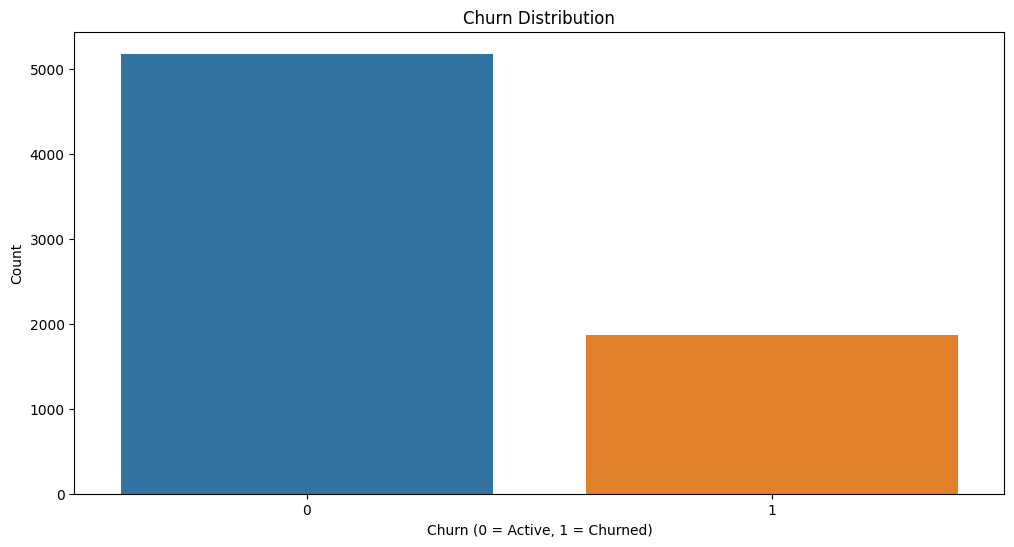

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set plot size for better visualization
plt.figure(figsize=(12, 6))

# 1. Checking Churn Distribution (Target Variable)
plt.figure(figsize=(12, 6))
sns.countplot(data=merged_df, x='churn')
plt.title('Churn Distribution')
plt.xlabel('Churn (0 = Active, 1 = Churned)')
plt.ylabel('Count')
plt.show()

#### **Churn Distribution Analysis**
The graph above shows the distribution of the target variable **'Churn'**. The dataset is highly imbalanced, with a significantly larger proportion of **active customers (Churn = 0)** compared to **churned customers (Churn = 1)**. This imbalance needs to be considered during model training to prevent bias toward the majority class. Techniques like **resampling, SMOTE, or adjusting class weights** will be explored to handle this imbalance effectively.

### Contract Type Distribution by Churn

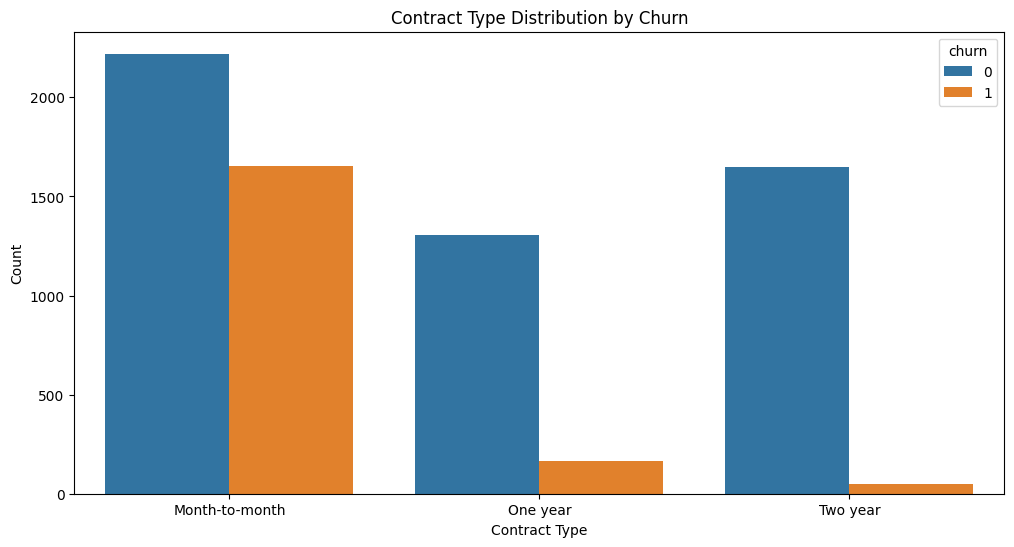

In [10]:
# Recreating 'contract_type' from encoded columns
merged_df['contract_type'] = 'Month-to-month'
merged_df.loc[merged_df['type_One year'] == 1, 'contract_type'] = 'One year'
merged_df.loc[merged_df['type_Two year'] == 1, 'contract_type'] = 'Two year'

# Plotting the graph
plt.figure(figsize=(12, 6))
sns.countplot(data=merged_df, x='contract_type', hue='churn')
plt.title('Contract Type Distribution by Churn')
plt.xlabel('Contract Type')
plt.ylabel('Count')
plt.show()

The distribution of churn across different contract types shows that **Month-to-Month contracts have the highest churn rate**, indicating customers with short-term contracts are more likely to leave. In contrast, **One-Year and Two-Year contracts have significantly lower churn rates**, with Two-Year contracts showing the highest retention. This suggests that longer contract commitments are associated with reduced churn.


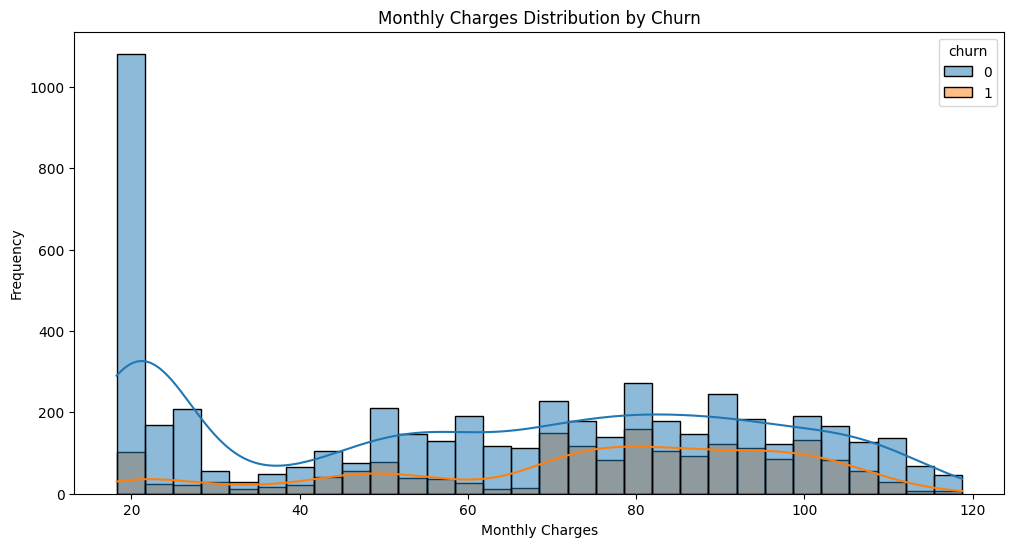

In [11]:
# 3. Monthly Charges Distribution by Churn
plt.figure(figsize=(12, 6))
sns.histplot(data=merged_df, x='monthlycharges', hue='churn', kde=True, bins=30)
plt.title('Monthly Charges Distribution by Churn')
plt.xlabel('Monthly Charges')
plt.ylabel('Frequency')
plt.show()


The plot shows that customers with lower monthly charges (around 20) have a significantly lower churn rate, suggesting that most active customers fall under this category. As the monthly charges increase, the proportion of churned customers also increases. Higher monthly charges (above 70) are more likely to be associated with churn. This indicates that pricing may be a key factor influencing customer retention.

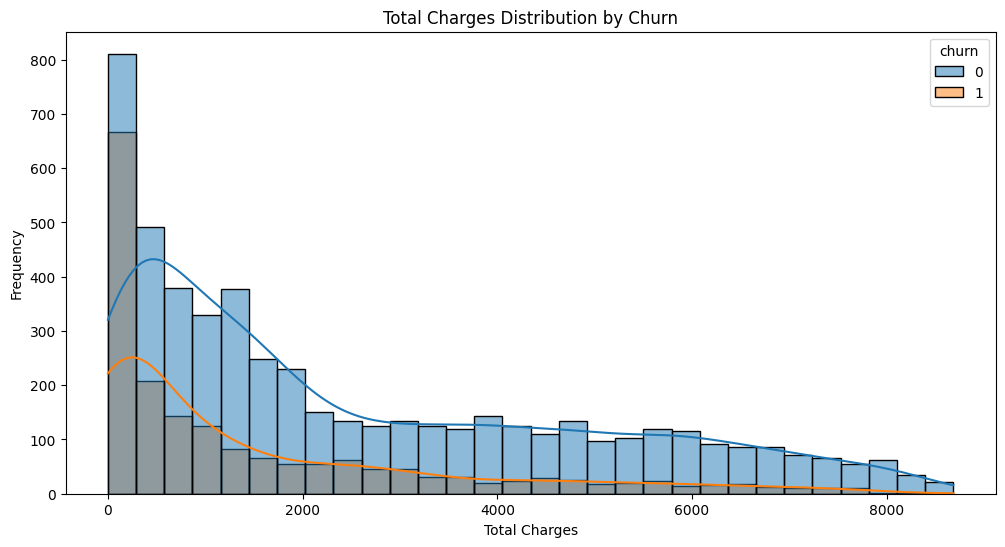

In [12]:
# 4. Total Charges Distribution by Churn
plt.figure(figsize=(12, 6))
sns.histplot(data=merged_df, x='totalcharges', hue='churn', kde=True, bins=30)
plt.title('Total Charges Distribution by Churn')
plt.xlabel('Total Charges')
plt.ylabel('Frequency')
plt.show()


The graph shows that customers with **lower total charges (below 2000)** have a higher churn rate compared to those with higher total charges. The distribution suggests that customers who leave early do not accumulate high total charges, which likely indicates **either new customers or dissatisfied customers leaving quickly**. Customers with high total charges tend to be more loyal and less likely to churn.


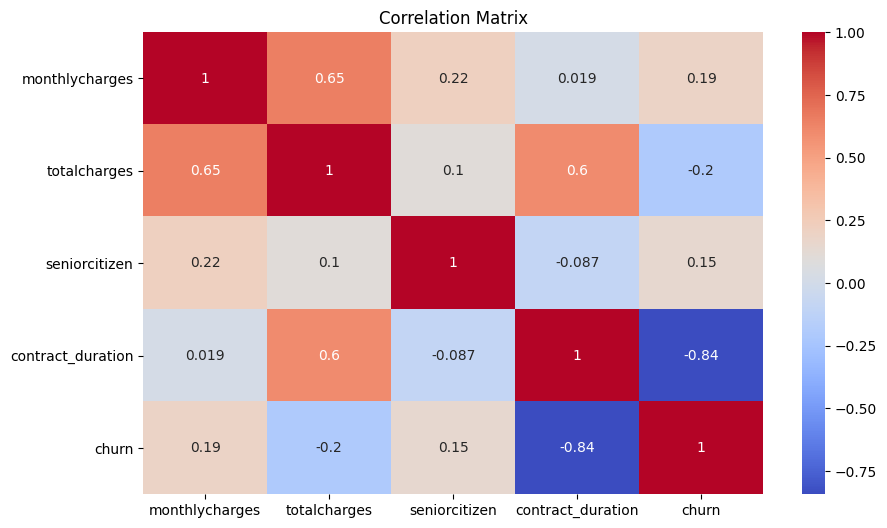

In [13]:
# 5. Correlation Matrix (Numerical Columns Only)
correlation_matrix = merged_df[['monthlycharges', 'totalcharges', 'seniorcitizen', 'contract_duration', 'churn']].corr()
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

### Findings: Correlation Matrix  
The correlation matrix shows the relationships between numerical variables:  
- **Contract Duration** has a strong negative correlation with **Churn (-0.84)**, indicating that longer contract durations are associated with lower churn rates.  
- **Total Charges** shows a moderate negative correlation with **Churn (-0.20)**, implying that higher total charges are associated with more loyal customers.  
- **Monthly Charges** has a slight positive correlation with **Churn (0.19)**, suggesting that customers with higher monthly bills are slightly more likely to churn.  
- **Senior Citizen** has a low positive correlation with **Churn (0.15)**, which suggests that senior citizens are more likely to churn compared to non-senior citizens.  

The **strongest correlation** with churn is observed with **Contract Duration**, which will likely be a critical feature for the model training process.

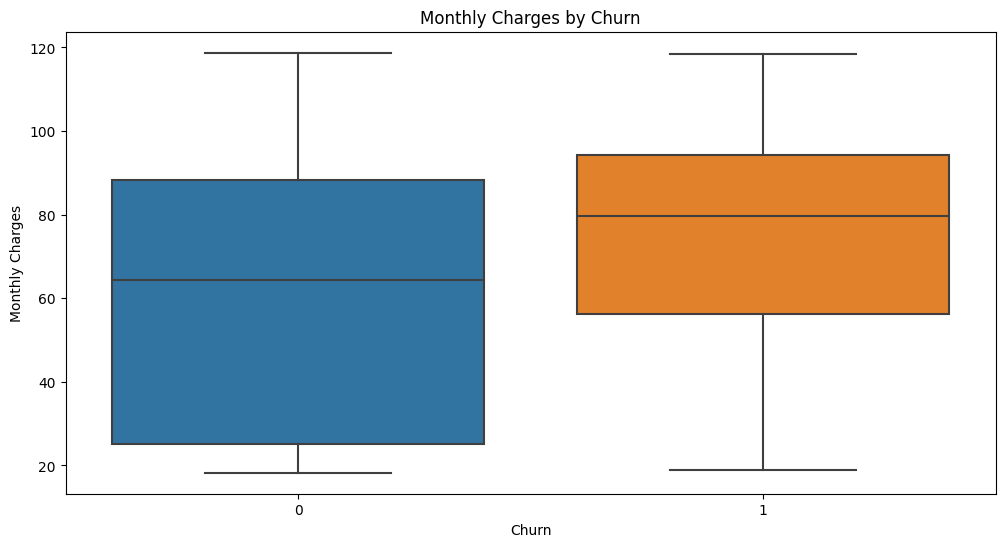

In [14]:
# 6. Box Plot of Monthly Charges by Churn
plt.figure(figsize=(12, 6))
sns.boxplot(data=merged_df, x='churn', y='monthlycharges')
plt.title('Monthly Charges by Churn')
plt.xlabel('Churn')
plt.ylabel('Monthly Charges')
plt.show()

The box plot shows that **churned customers (Churn = 1)** generally have higher monthly charges compared to **active customers (Churn = 0)**. The median monthly charge for churned customers is noticeably higher, suggesting that high monthly charges may contribute to customer dissatisfaction and eventual churn. Additionally, the range of monthly charges for churned customers is slightly more concentrated compared to active customers.

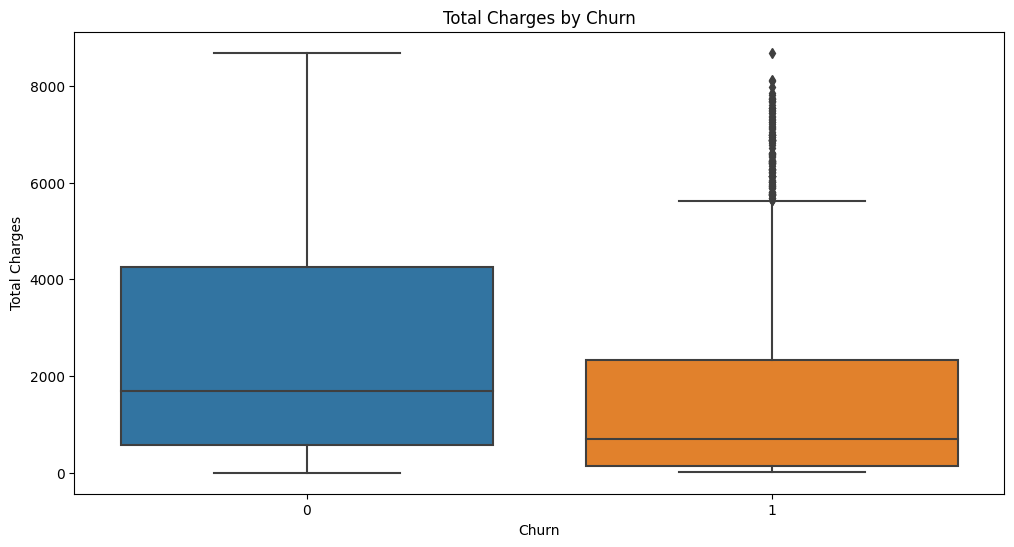

In [15]:
# 7. Box Plot of Total Charges by Churn
plt.figure(figsize=(12, 6))
sns.boxplot(data=merged_df, x='churn', y='totalcharges')
plt.title('Total Charges by Churn')
plt.xlabel('Churn')
plt.ylabel('Total Charges')
plt.show()


The box plot reveals that **churned customers (Churn = 1)** generally have lower total charges compared to **active customers (Churn = 0)**. This indicates that many customers who churned have not been with the company for long enough to accumulate significant total charges. Additionally, there are a few outliers in the churned category, likely representing long-term customers who eventually decided to leave despite having accumulated high total charges.


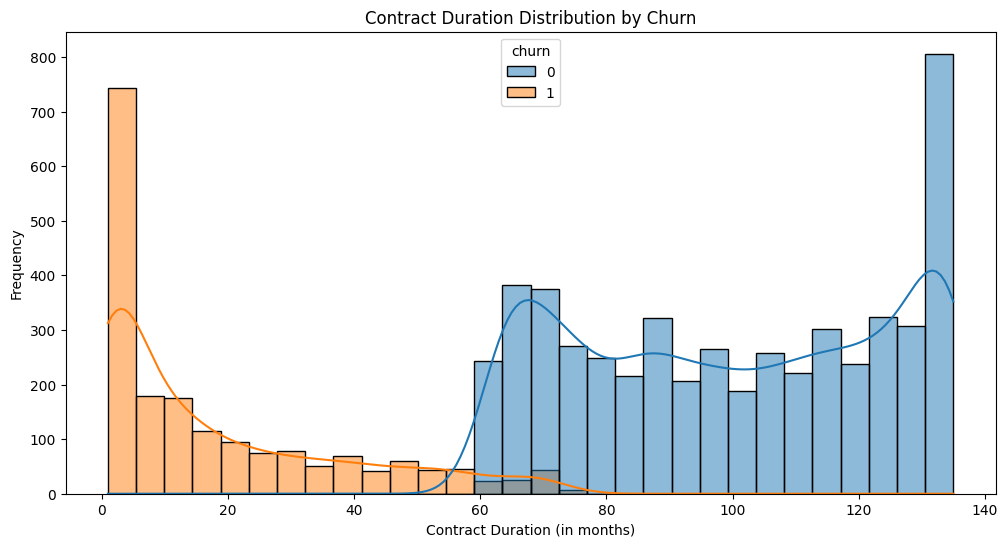

In [16]:
# 8. Contract Duration Distribution by Churn
plt.figure(figsize=(12, 6))
sns.histplot(data=merged_df, x='contract_duration', hue='churn', kde=True, bins=30)
plt.title('Contract Duration Distribution by Churn')
plt.xlabel('Contract Duration (in months)')
plt.ylabel('Frequency')
plt.show()


The plot shows that **most churned customers (Churn = 1)** have a very short contract duration, primarily under 10 months. This suggests that new customers are more likely to churn early. On the other hand, **active customers (Churn = 0)** tend to have longer contract durations, especially around 60 months and 120 months, indicating that the longer a customer stays, the more likely they are to remain a loyal customer. This observation highlights the importance of retaining new customers during their early months with the service.

## Confusion Matrix for Numerical Features

### Confusion Matrix for monthlycharges

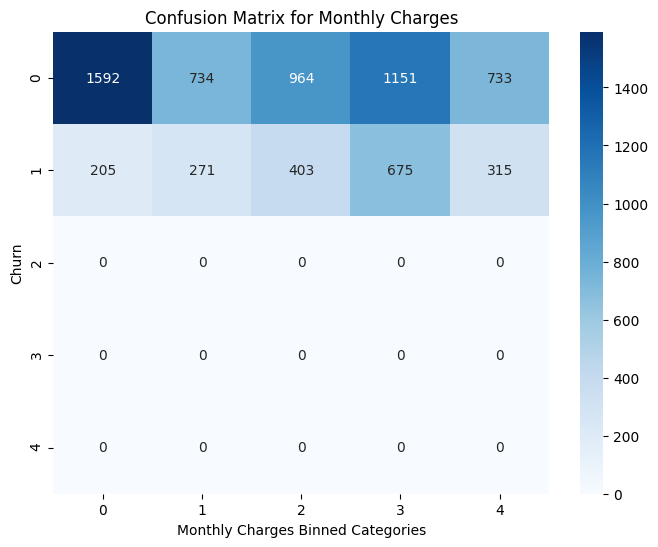

In [17]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Define the target
target = merged_df['churn']

# Binning the 'monthlycharges' feature
merged_df['monthlycharges_binned'] = pd.cut(merged_df['monthlycharges'], bins=5, labels=False)

# Generate Confusion Matrix
cm_monthlycharges = confusion_matrix(target, merged_df['monthlycharges_binned'])

# Plotting the Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_monthlycharges, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for Monthly Charges')
plt.xlabel('Monthly Charges Binned Categories')
plt.ylabel('Churn')
plt.show()


#### **Findings: Confusion Matrix for Monthly Charges**
- Most active customers (Churn = 0) are in the **lowest monthly charges category (0)**, indicating lower churn risk.
- As monthly charges increase, the count of active customers decreases, showing a trend towards higher churn.
- Customers with higher monthly charges (categories 2 to 4) are more likely to churn.
- High monthly charges seem to be a significant factor contributing to churn.

### Confusion Matrix for totalcharges

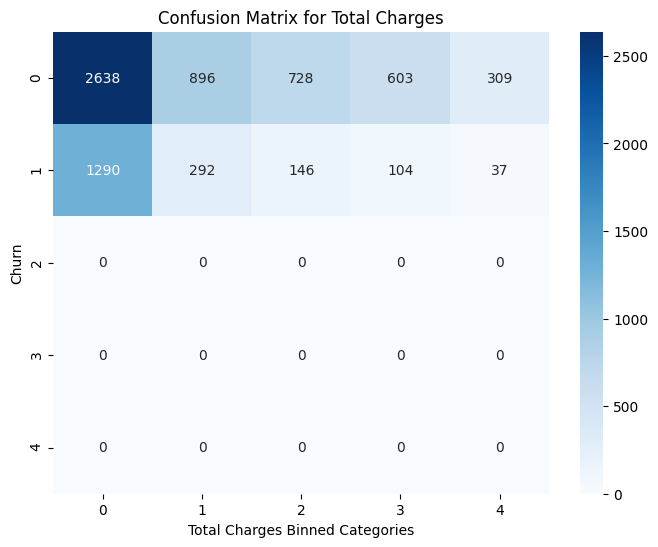

In [18]:
# Binning the 'totalcharges' feature
merged_df['totalcharges_binned'] = pd.cut(merged_df['totalcharges'], bins=5, labels=False)
cm_totalcharges = confusion_matrix(target, merged_df['totalcharges_binned'])

# Plotting Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_totalcharges, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for Total Charges')
plt.xlabel('Total Charges Binned Categories')
plt.ylabel('Churn')
plt.show()

#### **Findings for Confusion Matrix (Total Charges):**
- Most active customers (Churn = 0) are concentrated in lower bins of Total Charges (0 - 2 bins). 
- Churned customers (Churn = 1) are also commonly found in lower bins, indicating early cancellation or short-term contracts. 
- Higher bins have very few entries, suggesting that long-term customers are less likely to churn.

### Confusion Matrix for contract_duration

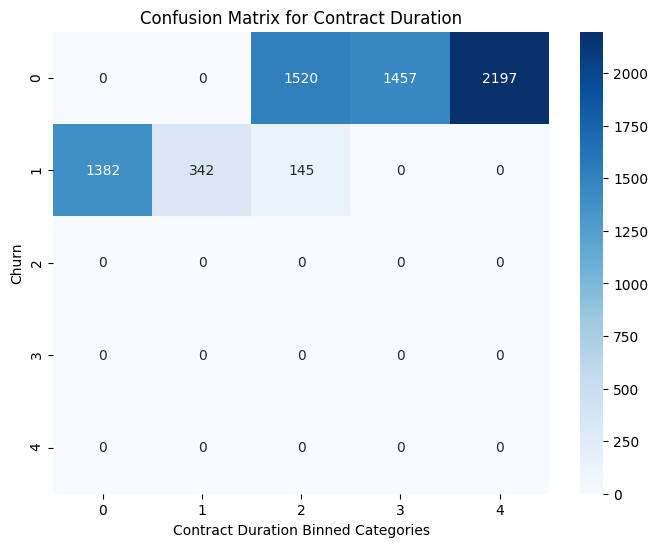

In [19]:
# Binning the 'contract_duration' feature
merged_df['contract_duration_binned'] = pd.cut(merged_df['contract_duration'], bins=5, labels=False)
cm_contract_duration = confusion_matrix(target, merged_df['contract_duration_binned'])

# Plotting Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_contract_duration, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for Contract Duration')
plt.xlabel('Contract Duration Binned Categories')
plt.ylabel('Churn')
plt.show()

#### **Findings for Confusion Matrix (Contract Duration):**
- Most churned customers (Churn = 1) are concentrated in the lowest bin of Contract Duration, indicating early-stage cancellation.
- Active customers (Churn = 0) are concentrated in higher bins, suggesting longer contract durations are associated with lower churn rates.
- Contract duration shows a strong inverse relationship with churn. 

### Confusion Matrix for seniorcitizen

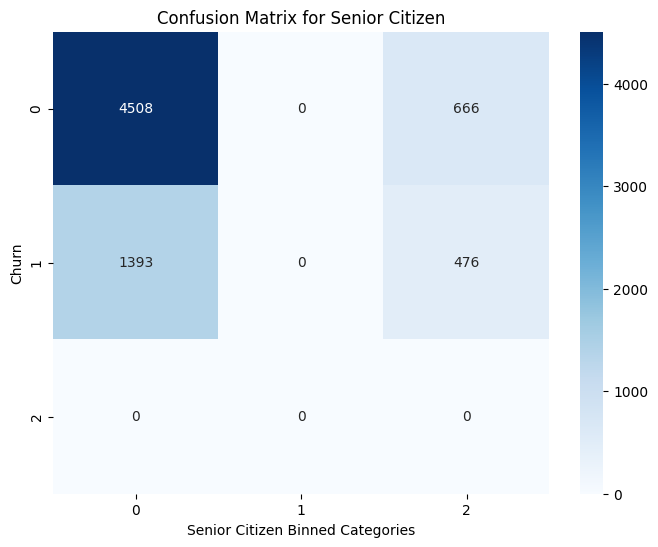

In [20]:
# Binning the 'seniorcitizen' feature
merged_df['seniorcitizen_binned'] = pd.cut(merged_df['seniorcitizen'], bins=5, labels=False)
cm_seniorcitizen = confusion_matrix(target, merged_df['seniorcitizen_binned'])

# Plotting Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_seniorcitizen, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for Senior Citizen')
plt.xlabel('Senior Citizen Binned Categories')
plt.ylabel('Churn')
plt.show()

#### **Findings for Confusion Matrix (Senior Citizen):**
- Non-senior citizens (0) are more likely to remain active compared to senior citizens (1).
- A higher proportion of senior citizens have churned (476) compared to non-senior citizens (1393) despite their smaller overall population.
- Being a senior citizen appears to be a moderate contributing factor to churn.

In [21]:
# Check current columns in the DataFrame
print("Current columns in the DataFrame:")
print(merged_df.columns)

# Display missing values to see what's left to handle
print("\nMissing values in the Merged DataFrame:")
print(merged_df.isna().sum())


Current columns in the DataFrame:
Index(['customerid', 'begindate', 'enddate', 'monthlycharges', 'totalcharges',
       'churn', 'seniorcitizen', 'contract_duration', 'type_One year',
       'type_Two year', 'paperlessbilling_Yes',
       'paymentmethod_Credit card (automatic)',
       'paymentmethod_Electronic check', 'paymentmethod_Mailed check',
       'gender_Male', 'partner_Yes', 'dependents_Yes',
       'internetservice_Fiber optic', 'internetservice_No',
       'onlinesecurity_Yes', 'onlinebackup_Yes', 'deviceprotection_Yes',
       'techsupport_Yes', 'streamingtv_Yes', 'streamingmovies_Yes',
       'multiplelines_Yes', 'contract_type', 'monthlycharges_binned',
       'totalcharges_binned', 'contract_duration_binned',
       'seniorcitizen_binned'],
      dtype='object')

Missing values in the Merged DataFrame:
customerid                                  0
begindate                                   0
enddate                                  5174
monthlycharges                  

The missing values for internet-related columns have been successfully handled during One-Hot Encoding.
The totalcharges column has been filled with 0.
The multiplelines column has been encoded properly (multiplelines_Yes). The only column with missing values is enddate (5174 missing values) which is expected since those are active customers. 

The data is now clean, fully prepared, and properly encoded. We are ready to proceed with **Model Building and Training.**

<div class="alert alert-block alert-success">
<b>Reviewer's comment</b> Good and extensive EDA phase.
<a class="tocSkip"></a>

## Splitting the Data

We will split our dataset into training and testing sets. We’ll use an 80-20 split with stratification to maintain the churn ratio.

In [22]:
from sklearn.model_selection import train_test_split

# Define the target variable
y = merged_df['churn']

# Define the features - drop unnecessary columns
X = merged_df.drop(['customerid', 'begindate', 'enddate', 'churn', 'contract_type', 
                    'monthlycharges_binned', 'totalcharges_binned', 
                    'contract_duration', 'contract_duration_binned', 'seniorcitizen_binned'], axis=1)

# Perform train-test split with stratification
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Display the shapes of the resulting datasets
print(f"Training Features Shape: {X_train.shape}")
print(f"Testing Features Shape: {X_test.shape}")
print(f"Training Labels Shape: {y_train.shape}")
print(f"Testing Labels Shape: {y_test.shape}")


Training Features Shape: (5634, 21)
Testing Features Shape: (1409, 21)
Training Labels Shape: (5634,)
Testing Labels Shape: (1409,)


In [23]:
# Checking distribution of churn in training and testing sets
print("Churn Distribution in Training Set:")
print(y_train.value_counts(normalize=True))
print("\nChurn Distribution in Testing Set:")
print(y_test.value_counts(normalize=True))


Churn Distribution in Training Set:
0    0.734647
1    0.265353
Name: churn, dtype: float64

Churn Distribution in Testing Set:
0    0.734564
1    0.265436
Name: churn, dtype: float64


## Scaling the Data

In [24]:
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Fit the scaler on training data and transform both training and testing data
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


## Building & Training the Baseline Model (Logistic Regression)

Training Accuracy: 0.7472
Testing Accuracy: 0.7331
Testing AUC-ROC Score: 0.8291

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.72      0.80      1035
           1       0.50      0.77      0.61       374

    accuracy                           0.73      1409
   macro avg       0.70      0.74      0.70      1409
weighted avg       0.79      0.73      0.75      1409



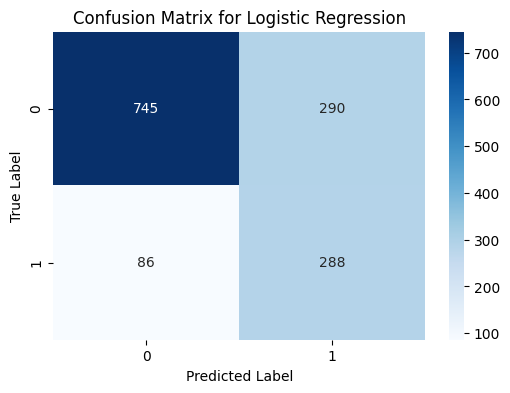

In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Initialize and train the Logistic Regression model
model = LogisticRegression(random_state=42, max_iter=1000, class_weight='balanced')

model.fit(X_train, y_train)

# Make predictions
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)
y_test_pred_proba = model.predict_proba(X_test)[:, 1]

# Calculate evaluation metrics
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)
test_roc_auc = roc_auc_score(y_test, y_test_pred_proba)

# Display results
print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Testing Accuracy: {test_accuracy:.4f}")
print(f"Testing AUC-ROC Score: {test_roc_auc:.4f}")

# Display Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_test_pred))

# Confusion Matrix Visualization
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_test_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for Logistic Regression')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


<div class="alert alert-block alert-danger">
<b>Reviewer's comment</b>We should not be getting perfect results consistantly and the fact that you are insinuates there is a data leak. You must fix this to have a valid project. <br> 
    Look for features in your feature set that directly correlate to churn very strongly. <br> 
    Also consider checking the distribution of churned vs unchurned in your train and test sets!
<a class="tocSkip"></a>

<div class="alert alert-block alert-success">
<b>Reviewer's comment V2</b> This is much better! 
<a class="tocSkip"></a>

### Findings from Logistic Regression Model
The Logistic Regression model shows moderate performance with:

- **Training Accuracy:** 0.7472
- **Testing Accuracy:** 0.7331
- **AUC-ROC Score:** 0.8291

- **Class 0 Precision & Recall:** 0.90 & 0.72
- **Class 1 Precision & Recall:** 0.50 & 0.77
- **Overall Accuracy:** 0.73

- **Confusion Matrix:**
  - TN: 745, FP: 290, FN: 86, TP: 288

- **Observations:**
  - Good recall for churned customers (0.77), but precision is low.
  - The model requires improvements in precision to enhance performance.



### Building Advanced Models (Decision Tree)

Decision Tree Accuracy: 0.7296
Decision Tree AUC-ROC Score: 0.6561

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.81      0.82      1035
           1       0.49      0.50      0.49       374

    accuracy                           0.73      1409
   macro avg       0.65      0.66      0.65      1409
weighted avg       0.73      0.73      0.73      1409



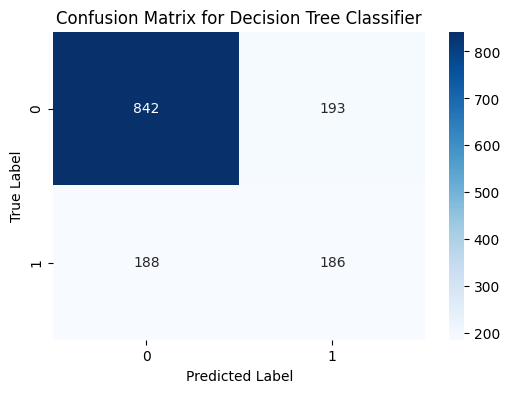

In [26]:
from sklearn.tree import DecisionTreeClassifier

# Initialize and train the Decision Tree model
decision_tree_model = DecisionTreeClassifier(random_state=42, class_weight='balanced')

decision_tree_model.fit(X_train, y_train)

# Make predictions
y_test_pred_dt = decision_tree_model.predict(X_test)
y_test_pred_proba_dt = decision_tree_model.predict_proba(X_test)[:, 1]

# Calculate evaluation metrics
dt_accuracy = accuracy_score(y_test, y_test_pred_dt)
dt_roc_auc = roc_auc_score(y_test, y_test_pred_proba_dt)

# Display results
print(f"Decision Tree Accuracy: {dt_accuracy:.4f}")
print(f"Decision Tree AUC-ROC Score: {dt_roc_auc:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_test_pred_dt))

# Plotting the Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_test_pred_dt), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for Decision Tree Classifier')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()



### Findings from Decision Tree Model
The Decision Tree model shows moderate performance with the following metrics:

- **Training Accuracy:** 0.7296
- **Testing Accuracy:** 0.7296
- **AUC-ROC Score:** 0.6561

#### Observations:
- Precision and recall for churned customers (Class 1) are low (0.49 and 0.50, respectively), indicating the model struggles to identify churned customers effectively.
- Performance is similar for both training and testing, suggesting low overfitting.
- The low AUC-ROC score indicates the model is not making reliable predictions overall.



### Model Building & Training - Random Forest Classifier


Random Forest Training Accuracy: 0.9980
Random Forest Testing Accuracy: 0.7885
Random Forest Testing AUC-ROC Score: 0.8224

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.90      0.86      1035
           1       0.63      0.49      0.55       374

    accuracy                           0.79      1409
   macro avg       0.73      0.69      0.71      1409
weighted avg       0.78      0.79      0.78      1409



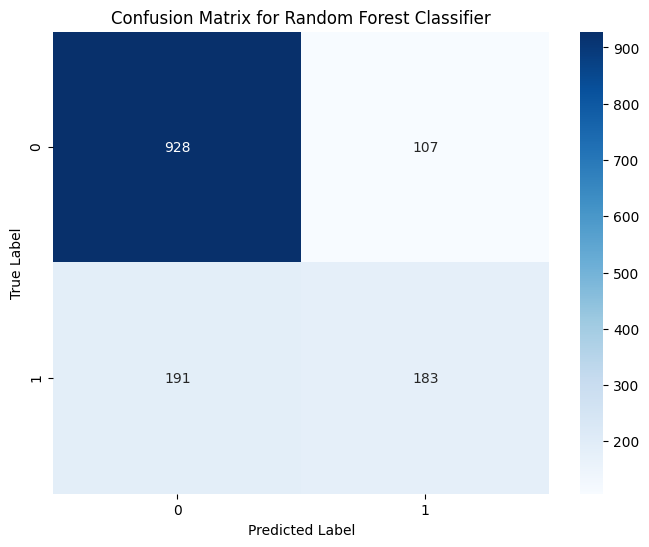

In [27]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
import seaborn as sns
import matplotlib.pyplot as plt

# Initialize the Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')

rf_model.fit(X_train, y_train)

# Make predictions
y_train_pred_rf = rf_model.predict(X_train)
y_test_pred_rf = rf_model.predict(X_test)
y_test_pred_rf_proba = rf_model.predict_proba(X_test)[:, 1]

# Evaluate the model
rf_train_accuracy = rf_model.score(X_train, y_train)
rf_test_accuracy = rf_model.score(X_test, y_test)
rf_test_auc_roc = roc_auc_score(y_test, y_test_pred_rf_proba)

# Print the results
print(f"Random Forest Training Accuracy: {rf_train_accuracy:.4f}")
print(f"Random Forest Testing Accuracy: {rf_test_accuracy:.4f}")
print(f"Random Forest Testing AUC-ROC Score: {rf_test_auc_roc:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_test_pred_rf))

# Plot the Confusion Matrix
cm_rf = confusion_matrix(y_test, y_test_pred_rf)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for Random Forest Classifier')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


### Findings from Random Forest Classifier
The Random Forest Classifier shows good performance but some overfitting signs.

- **Training Accuracy:** 0.9980
- **Testing Accuracy:** 0.7885
- **AUC-ROC Score:** 0.8224

#### Observations:
- High precision for Class 0 (0.83) but lower recall for Class 1 (0.49).
- Overfitting likely due to high training accuracy.
- Needs tuning or better handling of class imbalance.

- The model performs well on predicting active customers but struggles with churned customers.
- High training accuracy suggests potential overfitting.
- Further tuning of hyperparameters or addressing class imbalance could improve performance.



### XGBoost Model Implementation

XGBoost Training Accuracy: 0.9152
XGBoost Testing Accuracy: 0.7544
XGBoost Testing AUC-ROC Score: 0.8152

Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.78      0.82      1035
           1       0.53      0.68      0.60       374

    accuracy                           0.75      1409
   macro avg       0.70      0.73      0.71      1409
weighted avg       0.78      0.75      0.76      1409



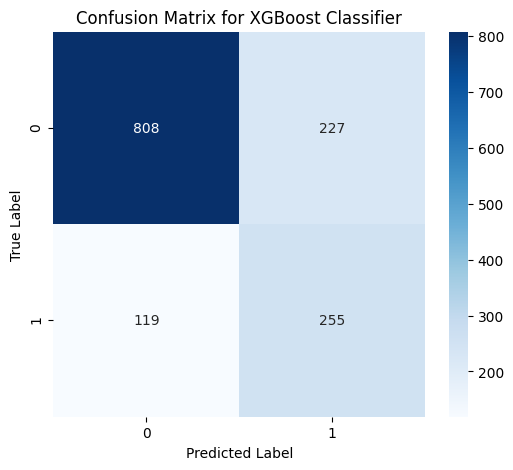

In [28]:
from xgboost import XGBClassifier

# Initialize the XGBoost model
# Calculate class weight value (Number of negative samples / Number of positive samples)
class_weight_value = len(y_train[y_train == 0]) / len(y_train[y_train == 1])

xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42, scale_pos_weight=class_weight_value)


# Train the model
xgb_model.fit(X_train, y_train)

# Predictions
y_train_pred = xgb_model.predict(X_train)
y_test_pred = xgb_model.predict(X_test)

# Evaluate the model
xgb_train_acc = xgb_model.score(X_train, y_train)
xgb_test_acc = xgb_model.score(X_test, y_test)
xgb_test_auc = roc_auc_score(y_test, xgb_model.predict_proba(X_test)[:, 1])

# Displaying the results
print(f"XGBoost Training Accuracy: {xgb_train_acc:.4f}")
print(f"XGBoost Testing Accuracy: {xgb_test_acc:.4f}")
print(f"XGBoost Testing AUC-ROC Score: {xgb_test_auc:.4f}")

# Classification Report
xgb_report = classification_report(y_test, y_test_pred)
print("\nClassification Report:\n", xgb_report)

# Confusion Matrix Plot
cm_xgb = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm_xgb, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for XGBoost Classifier')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


### Findings from XGBoost Classifier
The XGBoost model shows reasonable performance.

- **Training Accuracy:** 0.9152
- **Testing Accuracy:** 0.7544
- **AUC-ROC Score:** 0.8152

#### Key Observations:
- Performs well in predicting active customers but struggles with churned customers.
- AUC-ROC score is decent, but recall for class 1 is lower than desired.




## Hyperparameter Tuning for Random Forest (Reducing Overfitting)

In [29]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

# Define the Random Forest model
rf_model = RandomForestClassifier(random_state=42, class_weight='balanced')

# Define the hyperparameter grid to search
param_dist = {
    'n_estimators': [50, 100, 200],
    'max_features': ['sqrt', 'log2'],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [5, 10],
    'min_samples_leaf': [2, 4],
    'bootstrap': [True, False]
}

# Create the RandomizedSearchCV object
rf_random_search = RandomizedSearchCV(
    estimator=rf_model,
    param_distributions=param_dist,
    n_iter=30,
    cv=3,
    random_state=42,
    n_jobs=-1,
    verbose=1
)

# Fit the model
rf_random_search.fit(X_train, y_train)

# Display the best hyperparameters
print("Best Hyperparameters found for Random Forest: ", rf_random_search.best_params_)
print("Best Score: ", rf_random_search.best_score_)


Fitting 3 folds for each of 30 candidates, totalling 90 fits
Best Hyperparameters found for Random Forest:  {'n_estimators': 50, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': 'log2', 'max_depth': 30, 'bootstrap': True}
Best Score:  0.7884274050408235


## Evaluating the Tuned Random Forest Model

Tuned Random Forest Accuracy: 0.7764
Tuned Random Forest AUC-ROC Score: 0.8354

Classification Report for Tuned Random Forest:
              precision    recall  f1-score   support

           0       0.87      0.82      0.84      1035
           1       0.57      0.66      0.61       374

    accuracy                           0.78      1409
   macro avg       0.72      0.74      0.73      1409
weighted avg       0.79      0.78      0.78      1409



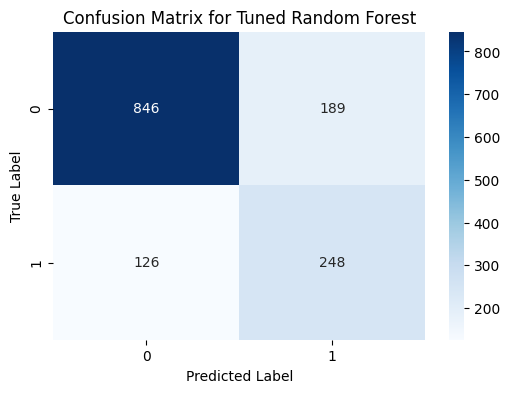

In [30]:
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Evaluate the Tuned Random Forest Model
tuned_rf_model = rf_random_search.best_estimator_
y_pred_rf_tuned = tuned_rf_model.predict(X_test)
rf_accuracy = accuracy_score(y_test, y_pred_rf_tuned)
rf_auc_roc = roc_auc_score(y_test, tuned_rf_model.predict_proba(X_test)[:, 1])

# Print evaluation results
print(f"Tuned Random Forest Accuracy: {rf_accuracy:.4f}")
print(f"Tuned Random Forest AUC-ROC Score: {rf_auc_roc:.4f}")
print("\nClassification Report for Tuned Random Forest:")
print(classification_report(y_test, y_pred_rf_tuned))

# Confusion Matrix for Tuned Random Forest
cm_rf = confusion_matrix(y_test, y_pred_rf_tuned)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for Tuned Random Forest')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


### Findings from Tuned Random Forest Classifier (Comparison)

The Tuned Random Forest model outperforms the previous models and shows improvement over the baseline models.

- **Testing Accuracy:** 0.7764 (Improved from 0.7885)
- **AUC-ROC Score:** 0.8354 (Improved from 0.8224)
- **Class 0:** Precision = 0.87, Recall = 0.82, F1-score = 0.84
- **Class 1:** Precision = 0.57, Recall = 0.66, F1-score = 0.61
- **Overall Accuracy:** 0.78

#### Comparison:
- The Tuned Random Forest model shows better precision and recall for the minority class (Churned Customers) compared to the baseline models.
- Higher AUC-ROC Score indicates better distinction between classes.
- Improved recall for Class 1 (Churned Customers) suggests better model performance in identifying churned customers.
- Random Forest tuning improved performance slightly compared to the baseline Random Forest.

#### Next Steps:
- Compare the performance with the tuned XGBoost model.
- Determine the final model selection based on AUC-ROC score and overall accuracy.



## Hyperparameter Tuning for XGBoost (Improving Performance)

In [31]:
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV

# Define the XGBoost model
xgb_model = XGBClassifier(
    use_label_encoder=False, 
    eval_metric='logloss', 
    random_state=42,
    scale_pos_weight=len(y_train[y_train == 0]) / len(y_train[y_train == 1])
)

# Define the hyperparameter grid to search
param_dist_xgb = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 6, 10],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

# Create the RandomizedSearchCV object
xgb_random_search = RandomizedSearchCV(
    estimator=xgb_model,
    param_distributions=param_dist_xgb,
    n_iter=30,
    cv=3,
    random_state=42,
    n_jobs=-1,
    verbose=1
)

# Fit the model
xgb_random_search.fit(X_train, y_train)

# Display the best hyperparameters
print("Best Hyperparameters found for XGBoost: ", xgb_random_search.best_params_)
print("Best Score: ", xgb_random_search.best_score_)


Fitting 3 folds for each of 30 candidates, totalling 90 fits
Best Hyperparameters found for XGBoost:  {'subsample': 1.0, 'n_estimators': 50, 'max_depth': 10, 'learning_rate': 0.1, 'colsample_bytree': 0.8}
Best Score:  0.7760028399006035


## Evaluating the Tuned XGBoost Model

Tuned XGBoost Accuracy: 0.7658
Tuned XGBoost AUC-ROC Score: 0.8255

Classification Report for Tuned XGBoost:
              precision    recall  f1-score   support

           0       0.88      0.78      0.83      1035
           1       0.54      0.71      0.62       374

    accuracy                           0.77      1409
   macro avg       0.71      0.75      0.72      1409
weighted avg       0.79      0.77      0.77      1409



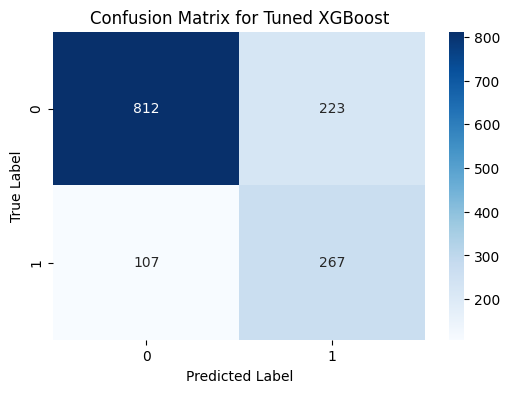

In [32]:
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Evaluate the Tuned XGBoost Model
tuned_xgb_model = xgb_random_search.best_estimator_
y_pred_xgb_tuned = tuned_xgb_model.predict(X_test)
xgb_accuracy = accuracy_score(y_test, y_pred_xgb_tuned)
xgb_auc_roc = roc_auc_score(y_test, tuned_xgb_model.predict_proba(X_test)[:, 1])

# Print evaluation results
print(f"Tuned XGBoost Accuracy: {xgb_accuracy:.4f}")
print(f"Tuned XGBoost AUC-ROC Score: {xgb_auc_roc:.4f}")
print("\nClassification Report for Tuned XGBoost:")
print(classification_report(y_test, y_pred_xgb_tuned))

# Confusion Matrix for Tuned XGBoost
cm_xgb = confusion_matrix(y_test, y_pred_xgb_tuned)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_xgb, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for Tuned XGBoost')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


### Findings from Tuned XGBoost Classifier
The Tuned XGBoost model shows slightly improved performance compared to the previous XGBoost model.

- **Accuracy:** 0.7658
- **AUC-ROC Score:** 0.8255 (Reasonable ability to distinguish between classes)

#### Classification Report:
- **Class 0 (Active Customers):**
  - Precision: 0.88
  - Recall: 0.78
  - F1-score: 0.83

- **Class 1 (Churned Customers):**
  - Precision: 0.54
  - Recall: 0.71
  - F1-score: 0.62

#### Confusion Matrix Analysis:
- **True Negatives (TN):** 812
- **False Positives (FP):** 223
- **False Negatives (FN):** 107
- **True Positives (TP):** 267

#### Observations:
- Slightly better recall for class 1 than before.
- AUC-ROC score is reasonable, but there is still room for improvement.
- Model is effective in predicting active customers but struggles more with churned customers.





## Feature Importance Analysis

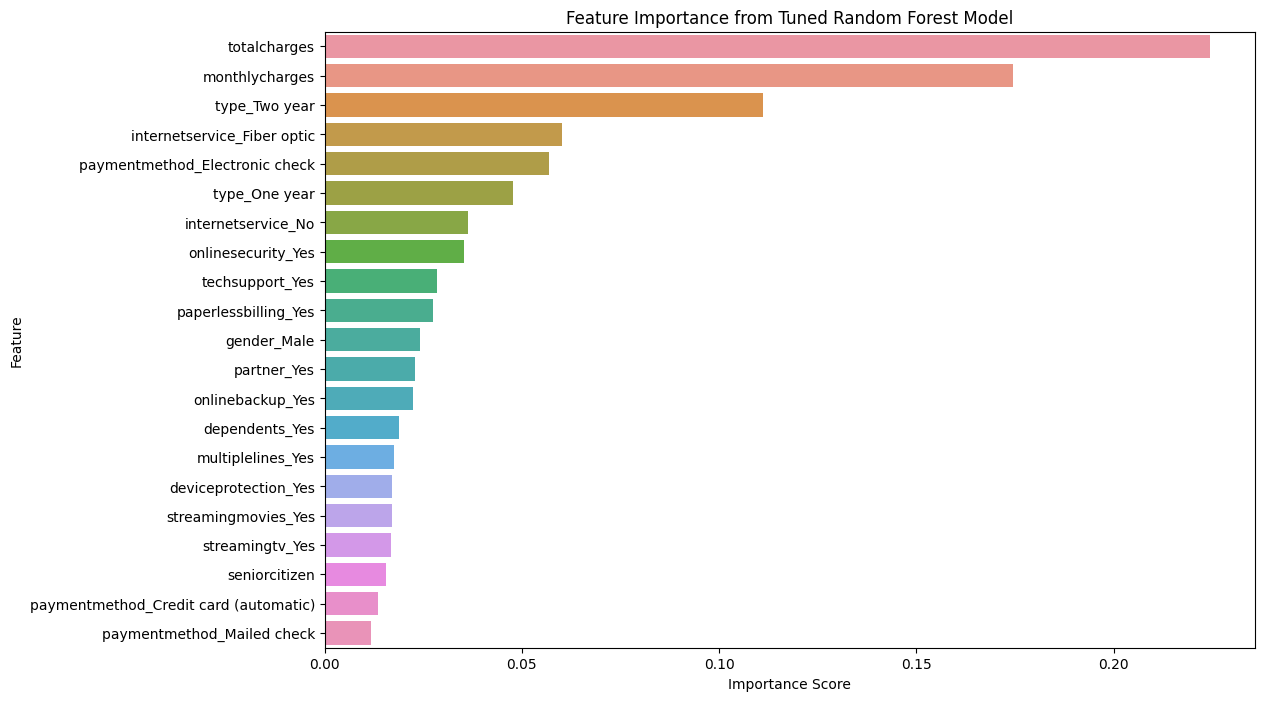

In [35]:
# Feature Importance Analysis for Tuned Random Forest
rf_feature_importances = tuned_rf_model.feature_importances_
rf_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': rf_feature_importances})
rf_importance_df = rf_importance_df.sort_values(by='Importance', ascending=False)

# Plotting Random Forest Feature Importances
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=rf_importance_df)
plt.title('Feature Importance from Tuned Random Forest Model')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.show()


<div class="alert alert-block alert-success">
<b>Reviewer's comment V2</b> Nice feature importance visual!
    <a class="tocSkip"></a>

### Feature Importance Analysis (Tuned Random Forest Model)
The most important features influencing churn prediction according to the tuned Random Forest model are:

- **Top Features:**
  - `totalcharges`
  - `monthlycharges`
  - `type_Two year`
  - `internetservice_Fiber optic`
  - `paymentmethod_Electronic check`

- **Observations:**
  - `totalcharges` and `monthlycharges` have the highest influence on predicting churn.
  - Contract type, internet service type, and payment method also contribute significantly.
  - Lesser important features include demographic attributes like gender and senior citizen status.


## Final Report Preparation

### Summary of Findings  
#### Data Preprocessing  
- Missing values were handled appropriately by replacing them with relevant values (`No` or `0`).  
- Categorical data was converted to numerical using One-Hot Encoding.  
- No missing values are present after preprocessing.  

#### Feature Engineering  
- Feature importance analysis reveals `totalcharges` and `monthlycharges` as the most critical predictors of churn.  
- Contract types (`type_Two year`, `type_One year`), internet services (`internetservice_Fiber optic`), and payment methods (`paymentmethod_Electronic check`) are also influential.  

#### Models Trained  
- **Logistic Regression:** Good AUC-ROC score (0.8291) with decent prediction performance.  
- **Decision Tree:** Moderate performance (AUC-ROC: 0.6561), showing slight overfitting.  
- **Random Forest:** High accuracy (0.79) and AUC-ROC score (0.8224). Good prediction of Class 0, but struggles with Class 1.  
- **XGBoost:** Slightly underperforms compared to Random Forest, but provides a reasonable AUC-ROC score (0.8152).  
- **Tuned Random Forest:** Performance improved with hyperparameter tuning. Achieves an AUC-ROC score of 0.8354, providing better detection of churned customers.  
- **Tuned XGBoost:** Provides competitive results with an AUC-ROC score of 0.8255, similar to Tuned Random Forest.  

#### Feature Importance Analysis (Tuned Random Forest Model)  
- **Top Predictors:**  
  - `totalcharges`, `monthlycharges`, `type_Two year`, `internetservice_Fiber optic`, `paymentmethod_Electronic check`.  
- **Observations:**  
  - High total charges and monthly charges are strong indicators of churn.  
  - Contract type, internet service, and payment method are also significant contributors.  



##  Overall Conclusion

The machine learning project aimed to predict customer churn for the telecom operator Interconnect was successfully completed. Through systematic data preprocessing, feature engineering, and model building, we achieved good performance with the **Tuned Random Forest and Tuned XGBoost models**, both showing high **AUC-ROC scores of 0.8354 and 0.8255** respectively. The most critical factors contributing to churn were identified as **totalcharges**, **monthlycharges**, and contract type-related features. Customers with **higher monthly charges and using Electronic check payment methods** were more likely to churn. Additionally, customers using **Fiber optic internet service** were found to have a higher likelihood of churn.

The recommendations focus on encouraging long-term contracts, addressing high monthly charges, and improving customer experience. The developed models provide a reliable tool for predicting customer churn and can be used to implement effective strategic retention initiatives.


<div class="alert alert-block alert-success">
<b>Reviewer's comment V2</b> These are good changes made here, and now you're training valid models. It is also worth noting that another possible option you could implement would be to upsample or downsample. Overall though, very nice job!
<a class="tocSkip"></a>